## Loading Packages

In [97]:
import warnings
warnings.filterwarnings("ignore")

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re, nltk, gensim, spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import *
from sklearn.metrics import log_loss
from nltk.stem.wordnet import WordNetLemmatizer 
import sklearn.metrics as metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

## Data Processing

In [99]:
Text_Data = pd.read_excel("BankReviews.xlsx")

In [100]:
Text_Data

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage
...,...,...,...,...
500,2016-02-06,1,\r\nI never write reviews but had to this time...,North American Savings Bank
501,2016-07-25,1,\r\nIt all started when Bob G ran a credit che...,North American Savings Bank
502,2017-09-27,1,\r\nWhat a horrible experience. We have excell...,North American Savings Bank
503,2017-12-24,1,"\r\nRep was extremely professional, friendly, ...",North American Savings Bank


In [101]:
Text_Data = Text_Data.drop(columns="Date",axis=1)

In [102]:
Clean_List = Text_Data.Reviews.values.tolist()
Clean_List

['Great job, Wyndham Capital! Each person was professional and helped us move through our refinance process smoothly. Thank you!',
 'Matthew Richardson is professional and helpful. He helped us find the correct product for our mortgage. Thank you very much for the excellent service, Matthew!',
 'We had a past experience with Wyndham Mortgage and would without question use again and again if needed!! Wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled together and found a viable option for us that ultimately saved us money. We would highly recommend Brad Thomka and the Wyndham Capital Mortgage team for your mortgage needs. Sincerest thanks Wyndham!! Ed & Lind',
 'We have been dealing with Brad Thomka from the beginning of what started out to be a very stressful time for us, but with the help from Brad and the entire Wyndham Mortgage team it was turned into a happy ending!! Brad and Wyndham went 

In [103]:
sw = stopwords.words("english")

In [104]:
Clean_List = [x.lower() for x in Clean_List]
Clean_List

['great job, wyndham capital! each person was professional and helped us move through our refinance process smoothly. thank you!',
 'matthew richardson is professional and helpful. he helped us find the correct product for our mortgage. thank you very much for the excellent service, matthew!',
 'we had a past experience with wyndham mortgage and would without question use again and again if needed!! wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled together and found a viable option for us that ultimately saved us money. we would highly recommend brad thomka and the wyndham capital mortgage team for your mortgage needs. sincerest thanks wyndham!! ed & lind',
 'we have been dealing with brad thomka from the beginning of what started out to be a very stressful time for us, but with the help from brad and the entire wyndham mortgage team it was turned into a happy ending!! brad and wyndham went 

In [105]:
Clean_List = [x.replace("\n","") for x in Clean_List]
Clean_List

['great job, wyndham capital! each person was professional and helped us move through our refinance process smoothly. thank you!',
 'matthew richardson is professional and helpful. he helped us find the correct product for our mortgage. thank you very much for the excellent service, matthew!',
 'we had a past experience with wyndham mortgage and would without question use again and again if needed!! wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled together and found a viable option for us that ultimately saved us money. we would highly recommend brad thomka and the wyndham capital mortgage team for your mortgage needs. sincerest thanks wyndham!! ed & lind',
 'we have been dealing with brad thomka from the beginning of what started out to be a very stressful time for us, but with the help from brad and the entire wyndham mortgage team it was turned into a happy ending!! brad and wyndham went 

In [106]:
Clean_List = [x.replace("\r","") for x in Clean_List]
Clean_List

['great job, wyndham capital! each person was professional and helped us move through our refinance process smoothly. thank you!',
 'matthew richardson is professional and helpful. he helped us find the correct product for our mortgage. thank you very much for the excellent service, matthew!',
 'we had a past experience with wyndham mortgage and would without question use again and again if needed!! wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled together and found a viable option for us that ultimately saved us money. we would highly recommend brad thomka and the wyndham capital mortgage team for your mortgage needs. sincerest thanks wyndham!! ed & lind',
 'we have been dealing with brad thomka from the beginning of what started out to be a very stressful time for us, but with the help from brad and the entire wyndham mortgage team it was turned into a happy ending!! brad and wyndham went 

In [107]:
regex = r'[^a-z]'
cc = ' '
for i in Clean_List:
    cc = cc + re.sub(pattern=regex,string=i,repl=' ')
cc    

' great job  wyndham capital  each person was professional and helped us move through our refinance process smoothly  thank you matthew richardson is professional and helpful  he helped us find the correct product for our mortgage  thank you very much for the excellent service  matthew we had a past experience with wyndham mortgage and would without question use again and again if needed   wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan  but they pulled together and found a viable option for us that ultimately saved us money  we would highly recommend brad thomka and the wyndham capital mortgage team for your mortgage needs  sincerest thanks wyndham   ed   lindwe have been dealing with brad thomka from the beginning of what started out to be a very stressful time for us  but with the help from brad and the entire wyndham mortgage team it was turned into a happy ending   brad and wyndham went beyond the extr

In [108]:
tokens = word_tokenize(text=cc)
tokens

['great',
 'job',
 'wyndham',
 'capital',
 'each',
 'person',
 'was',
 'professional',
 'and',
 'helped',
 'us',
 'move',
 'through',
 'our',
 'refinance',
 'process',
 'smoothly',
 'thank',
 'you',
 'matthew',
 'richardson',
 'is',
 'professional',
 'and',
 'helpful',
 'he',
 'helped',
 'us',
 'find',
 'the',
 'correct',
 'product',
 'for',
 'our',
 'mortgage',
 'thank',
 'you',
 'very',
 'much',
 'for',
 'the',
 'excellent',
 'service',
 'matthew',
 'we',
 'had',
 'a',
 'past',
 'experience',
 'with',
 'wyndham',
 'mortgage',
 'and',
 'would',
 'without',
 'question',
 'use',
 'again',
 'and',
 'again',
 'if',
 'needed',
 'wyndham',
 'went',
 'beyond',
 'the',
 'extra',
 'mile',
 'to',
 'not',
 'only',
 'right',
 'a',
 'wrong',
 'encountered',
 'from',
 'the',
 'servicer',
 'we',
 'were',
 'dealing',
 'on',
 'our',
 'previous',
 'loan',
 'but',
 'they',
 'pulled',
 'together',
 'and',
 'found',
 'a',
 'viable',
 'option',
 'for',
 'us',
 'that',
 'ultimately',
 'saved',
 'us',
 'mone

In [109]:
final_words =[]
for i in tokens:
    if i not in sw:
        final_words.append(i)
final_words        

['great',
 'job',
 'wyndham',
 'capital',
 'person',
 'professional',
 'helped',
 'us',
 'move',
 'refinance',
 'process',
 'smoothly',
 'thank',
 'matthew',
 'richardson',
 'professional',
 'helpful',
 'helped',
 'us',
 'find',
 'correct',
 'product',
 'mortgage',
 'thank',
 'much',
 'excellent',
 'service',
 'matthew',
 'past',
 'experience',
 'wyndham',
 'mortgage',
 'would',
 'without',
 'question',
 'use',
 'needed',
 'wyndham',
 'went',
 'beyond',
 'extra',
 'mile',
 'right',
 'wrong',
 'encountered',
 'servicer',
 'dealing',
 'previous',
 'loan',
 'pulled',
 'together',
 'found',
 'viable',
 'option',
 'us',
 'ultimately',
 'saved',
 'us',
 'money',
 'would',
 'highly',
 'recommend',
 'brad',
 'thomka',
 'wyndham',
 'capital',
 'mortgage',
 'team',
 'mortgage',
 'needs',
 'sincerest',
 'thanks',
 'wyndham',
 'ed',
 'lindwe',
 'dealing',
 'brad',
 'thomka',
 'beginning',
 'started',
 'stressful',
 'time',
 'us',
 'help',
 'brad',
 'entire',
 'wyndham',
 'mortgage',
 'team',
 'tur

In [110]:
final_words = pd.Series(final_words)
final_words

0               great
1                 job
2             wyndham
3             capital
4              person
             ...     
19166            nasb
19167            bank
19168         receive
19169    disappointed
19170            read
Length: 19171, dtype: object

## Most Frequent Words

In [111]:
Word_List = final_words.value_counts().sort_values(ascending = False)
Word_List = Word_List[Word_List>10]
Word_List

loan         313
process      253
would        246
us           207
home         191
            ... 
stars         11
purchased     11
answering     11
terms         11
exceeded      11
Length: 402, dtype: int64

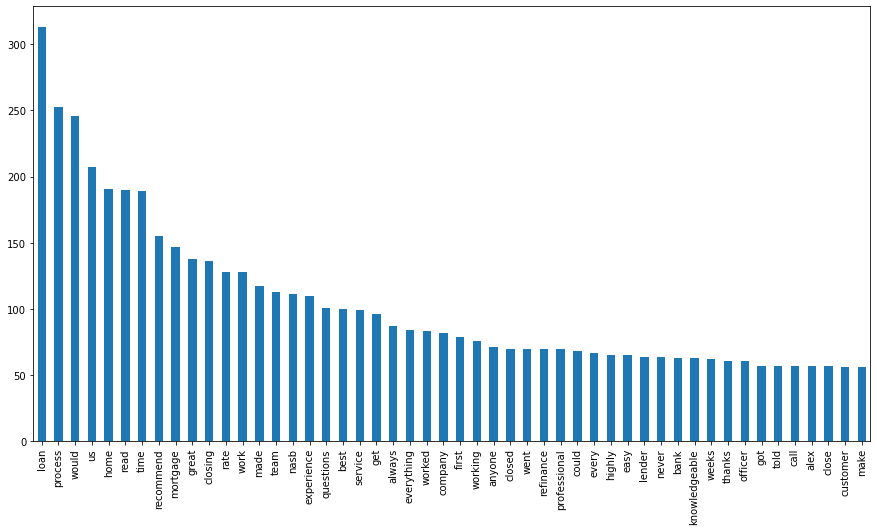

In [112]:
top_50 = Word_List[:50].index
Word_List[:50].plot(kind="bar",figsize=(15,8))
plt.show()

In [113]:
top_50 = pd.DataFrame(top_50)

In [114]:
top_50 = top_50.rename(columns={0:"Words"})

In [115]:
top_50['Polarity'] = top_50.Words.apply(lambda x : TextBlob(x).polarity)

In [116]:
top_50['Sentiment'] = np.where((top_50.Polarity==0),"Neutral",(np.where(top_50.Polarity<0,"Negative","Positive")))

In [117]:
top_50.Words[top_50.Sentiment=="Positive"]

9            great
18            best
25           first
31    professional
34          highly
35            easy
41          thanks
Name: Words, dtype: object

In [118]:
top_50.Words[top_50.Sentiment=="Negative"]

28    closed
Name: Words, dtype: object

In [119]:
top_50_cloud = list(Word_List[:50].index)
clean = "\n".join(top_50_cloud)
print(clean)

loan
process
would
us
home
read
time
recommend
mortgage
great
closing
rate
work
made
team
nasb
experience
questions
best
service
get
always
everything
worked
company
first
working
anyone
closed
went
refinance
professional
could
every
highly
easy
lender
never
bank
knowledgeable
weeks
thanks
officer
got
told
call
alex
close
customer
make


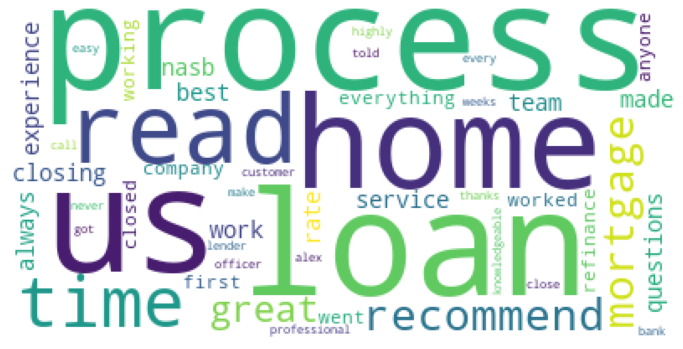

In [120]:
wordcloud = WordCloud(background_color='white',).generate(clean) 
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## Review Classification into "Positive", "Negative" & Neutral

In [121]:
def clean_text(text): 
    import re
    for i in text.split(" "):
        return ''.join(re.sub("([^A-Za-z \t])|(\/\/\S+)", "", text)).lower() 

In [122]:
New_Data = Text_Data.Reviews.apply(clean_text)

In [123]:
Text_Data.Reviews[0]

'Great job, Wyndham Capital! Each person was professional and helped us move through our refinance process smoothly. Thank you!'

In [124]:
New_Data=  New_Data.apply(lambda x: ' '.join([item for item in x.split() if item not in sw]))

In [125]:
New_Data[0]

'great job wyndham capital person professional helped us move refinance process smoothly thank'

In [126]:
import re
polarity_score = []
text = list(New_Data)
for item in text:
    tb = TextBlob(item)
    polarity_score.append(tb.polarity)

In [127]:
polarity_score

[0.43333333333333335,
 0.55,
 -0.03386904761904761,
 0.06123809523809526,
 0.08666666666666667,
 0.375,
 0.30000000000000004,
 0.21700680272108844,
 0.27499999999999997,
 0.5666666666666667,
 0.30833333333333335,
 0.1938095238095238,
 0.4238095238095239,
 0.1775,
 0.25102020202020203,
 0.5681818181818181,
 0.08333333333333334,
 -0.09545454545454546,
 0.14285714285714285,
 0.30999999999999994,
 0.06875,
 0.06875,
 0.3514285714285714,
 0.12954545454545455,
 0.09420138888888888,
 0.07901234567901237,
 0.25912698412698415,
 0.32333333333333336,
 0.21041666666666667,
 0.3305555555555556,
 0.38333333333333336,
 0.40925925925925927,
 0.37366666666666665,
 0.341904761904762,
 0.21333333333333332,
 0.21666666666666667,
 0.2,
 0.3,
 0.11933333333333333,
 0.0,
 -0.3434343434343434,
 0.06785714285714285,
 0.075,
 0.025661375661375666,
 -0.3333333333333333,
 -0.03333333333333333,
 0.030952380952380964,
 -0.028571428571428564,
 0.18625000000000003,
 0.3,
 0.5,
 0.20952380952380953,
 0.05535714285714

In [128]:
polarity_score = pd.Series(polarity_score,name = "Polarity")

In [129]:
Sentiment_df  = pd.concat([New_Data,polarity_score],axis=1)
Sentiment_df

,Reviews,Polarity
0,great job wyndham capital person professional ...,0.433333
1,matthew richardson professional helpful helped...,0.550000
2,past experience wyndham mortgage would without...,-0.033869
3,dealing brad thomka beginning started stressfu...,0.061238
4,cant express grateful support zach provided fa...,0.086667
...,...,...
500,never write reviews time prevent anyone making...,0.071530
501,started bob g ran credit check without knowled...,0.063889
502,horrible experience excellent credit plenty in...,0.135714
503,rep extremely professional friendly helpful fi...,0.186250


In [130]:
Sentiment_df['Sentiments'] = np.where(Sentiment_df.Polarity==0,"Neutral",(
                                        np.where(Sentiment_df.Polarity>0,"Positive","Negative")))

In [131]:
Sentiment_df

,Reviews,Polarity,Sentiments
0,great job wyndham capital person professional ...,0.433333,Positive
1,matthew richardson professional helpful helped...,0.550000,Positive
2,past experience wyndham mortgage would without...,-0.033869,Negative
3,dealing brad thomka beginning started stressfu...,0.061238,Positive
4,cant express grateful support zach provided fa...,0.086667,Positive
...,...,...,...
500,never write reviews time prevent anyone making...,0.071530,Positive
501,started bob g ran credit check without knowled...,0.063889,Positive
502,horrible experience excellent credit plenty in...,0.135714,Positive
503,rep extremely professional friendly helpful fi...,0.186250,Positive


## Topic Clustering

In [132]:
tf_idf_vectorizor = TfidfVectorizer(stop_words = sw,max_features = 20000)
%time tf_idf = tf_idf_vectorizor.fit_transform(New_Data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()
data = pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names())

CPU times: user 40.7 ms, sys: 5.62 ms, total: 46.3 ms
Wall time: 60.3 ms


In [133]:
data

,aaron,aarons,ability,able,absoltely,absolute,absolutely,accept,acceptable,accepted,...,yelp,yep,yes,yet,youi,youll,youre,zach,zelada,zero
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.524541,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.0,0.0,0.0,0.040979,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
501,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.113635,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
502,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
503,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [134]:
param_ada = {"n_clusters":[6,7,8,9,10,11,12] ,"random_state" : [123]}
gridsearch_ada = GridSearchCV(KMeans(),param_grid = param_ada,n_jobs = -1,cv = 2, verbose = True)
model_ada = gridsearch_ada.fit(data)

Fitting 2 folds for each of 7 candidates, totalling 14 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    7.8s finished


In [135]:
model_ada.best_estimator_

KMeans(n_clusters=12, random_state=123)

In [136]:
num_cluster = 12
km = KMeans(n_clusters = num_cluster)
km.fit(data)

KMeans(n_clusters=12)

In [137]:
set(km.labels_.tolist())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

In [138]:
clusters = km.labels_.tolist()

In [139]:
docs = Sentiment_df.Reviews
docs

0      great job wyndham capital person professional ...
1      matthew richardson professional helpful helped...
2      past experience wyndham mortgage would without...
3      dealing brad thomka beginning started stressfu...
4      cant express grateful support zach provided fa...
                             ...                        
500    never write reviews time prevent anyone making...
501    started bob g ran credit check without knowled...
502    horrible experience excellent credit plenty in...
503    rep extremely professional friendly helpful fi...
504    working loan consultant nasb told would give r...
Name: Reviews, Length: 505, dtype: object

In [140]:
print('no. of items clustered '+str(len(clusters)))
print('no. of docs '+str(len(docs)))

no. of items clustered 505
no. of docs 505


In [141]:
frame=pd.DataFrame(docs)
frame

,Reviews
0,great job wyndham capital person professional ...
1,matthew richardson professional helpful helped...
2,past experience wyndham mortgage would without...
3,dealing brad thomka beginning started stressfu...
4,cant express grateful support zach provided fa...
...,...
500,never write reviews time prevent anyone making...
501,started bob g ran credit check without knowled...
502,horrible experience excellent credit plenty in...
503,rep extremely professional friendly helpful fi...


In [142]:
frame['clusterid'] = clusters

In [143]:
frame.clusterid.value_counts()

7     102
2      71
3      52
4      42
10     39
9      38
11     33
1      32
5      29
8      25
6      24
0      18
Name: clusterid, dtype: int64

In [144]:
dist = 1 - cosine_similarity(data)

In [145]:
dist

array([[ 0.00000000e+00,  8.49914450e-01,  7.26356245e-01, ...,
         9.67727395e-01,  9.87273394e-01,  1.00000000e+00],
       [ 8.49914450e-01,  0.00000000e+00,  9.55939594e-01, ...,
         9.56409335e-01,  9.80341295e-01,  1.00000000e+00],
       [ 7.26356245e-01,  9.55939594e-01,  0.00000000e+00, ...,
         9.67424094e-01,  9.90108526e-01,  9.77712118e-01],
       ...,
       [ 9.67727395e-01,  9.56409335e-01,  9.67424094e-01, ...,
         0.00000000e+00,  8.31661366e-01,  9.19748765e-01],
       [ 9.87273394e-01,  9.80341295e-01,  9.90108526e-01, ...,
         8.31661366e-01, -2.22044605e-16,  9.47704757e-01],
       [ 1.00000000e+00,  1.00000000e+00,  9.77712118e-01, ...,
         9.19748765e-01,  9.47704757e-01, -2.22044605e-16]])

In [146]:
terms_s = list(final_words)

In [147]:
vocab_frame=pd.DataFrame({'words':terms_s},index=[final_words])
N=10
order_centroids = km.cluster_centers_.argsort()[:,::-1] 
order_centroids


array([[2631, 1039, 1049, ..., 1433, 2644, 1925],
       [1328, 2543, 1399, ..., 1756, 2375, 2023],
       [1873, 2353, 2468, ..., 2432,   29,   64],
       ...,
       [ 102, 2421, 1949, ..., 2200, 1328, 2437],
       [2596, 1399, 1109, ..., 1319, 1328, 2410],
       [ 412,  265, 2432, ..., 2353, 2023, 1049]])

In [148]:
print("Top terms per cluster:")
print()

order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
order_centroids
N=10
for i in range(num_cluster):
    print("Cluster %d:" % i, end='')
    
    for ind in order_centroids[i, :N]:
        print(' %s' % vocab_frame.loc[terms_s[ind].split(' ')].values.tolist()[0][0], end=',')
    print()
    print()

Top terms per cluster:

Cluster 0: home, kudos, first, select, actual, appreciative, timely, process, else, capital,

Cluster 1: closed, together, credit, overcoming, e, words, lower, along, retirement, patrick,

Cluster 2: minimal, service, shatz, disrespect, first, first, send, step, home, problems,

Cluster 3: customer, alex, provide, people, went, poor, credit, service, work, disrespect,

Cluster 4: competitive, us, kindness, credit, whole, go, sensed, questions, looks, top,

Cluster 5: wyndham, weeks, ask, select, timely, poor, done, friendly, total, counseling,

Cluster 6: prompt, back, family, happy, disrespect, beginning, received, kindness, va, poor,

Cluster 7: first, kindness, disrespect, went, overcoming, carla, options, moving, skills, va,

Cluster 8: time, changes, go, ok, really, michelle, credit, sign, would, past,

Cluster 9: dealing, honest, past, took, soon, family, old, thomka, poor, select,

Cluster 10: information, credit, husband, kept, would, across, mortgage, e

## Star Rating Prediction on basis of reviews

In [149]:
Sentiment_df['Actual_Star'] = Text_Data.Stars

In [150]:
Sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Reviews      505 non-null    object 
 1   Polarity     505 non-null    float64
 2   Sentiments   505 non-null    object 
 3   Actual_Star  505 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 15.9+ KB


In [151]:
Sentiment_df.Actual_Star.value_counts()

5    410
1     95
Name: Actual_Star, dtype: int64

In [152]:
X = Sentiment_df.Reviews
Y = Sentiment_df.Actual_Star

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

In [154]:
LR = LogisticRegression()

In [155]:
vect = TfidfVectorizer(lowercase=True, stop_words='english', max_features=20000, ngram_range=(1, 2))
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(378, 10233)
(127, 10233)


In [156]:
model_train = LogisticRegression(C=1e2).fit(X_train,y_train)

predict_train = model_train.predict(X_train)

accuracy_train = metrics.accuracy_score(y_train,predict_train)
print(accuracy_train)

0.9973544973544973


In [157]:
train_cm = metrics.classification_report(y_train,predict_train)
print(train_cm)

              precision    recall  f1-score   support

           1       1.00      0.99      0.99        70
           5       1.00      1.00      1.00       308

    accuracy                           1.00       378
   macro avg       1.00      0.99      1.00       378
weighted avg       1.00      1.00      1.00       378



In [158]:
CM_Train = metrics.confusion_matrix(y_train,predict_train)
CM_Train

array([[ 69,   1],
       [  0, 308]])

In [159]:
model_test = LogisticRegression(C=1e2).fit(X_test,y_test)

predit_test = model_test.predict(X_test)

print(metrics.classification_report(y_test,predit_test))

accuracy_test = metrics.accuracy_score(y_test,predit_test)
print(accuracy_test)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        25
           5       1.00      1.00      1.00       102

    accuracy                           1.00       127
   macro avg       1.00      1.00      1.00       127
weighted avg       1.00      1.00      1.00       127

1.0


In [160]:
CM_Test = metrics.confusion_matrix(y_test,predit_test)
print(CM_Test)

[[ 25   0]
 [  0 102]]


## Intent Analysis

In [161]:
from sklearn.decomposition import LatentDirichletAllocation

In [162]:
from pprint import pprint

In [163]:
from matplotlib import pyplot as plt

In [164]:
import warnings
warnings.filterwarnings('ignore')

In [165]:
import pyLDAvis
import pyLDAvis.sklearn

In [166]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) 

data_words = list(sent_to_words(New_Data))

/Users/abhishek/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [167]:
data_words

/Users/abhishek/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['great',
  'job',
  'wyndham',
  'capital',
  'person',
  'professional',
  'helped',
  'us',
  'move',
  'refinance',
  'process',
  'smoothly',
  'thank'],
 ['matthew',
  'richardson',
  'professional',
  'helpful',
  'helped',
  'us',
  'find',
  'correct',
  'product',
  'mortgage',
  'thank',
  'much',
  'excellent',
  'service',
  'matthew'],
 ['past',
  'experience',
  'wyndham',
  'mortgage',
  'would',
  'without',
  'question',
  'use',
  'needed',
  'wyndham',
  'went',
  'beyond',
  'extra',
  'mile',
  'right',
  'wrong',
  'encountered',
  'servicer',
  'dealing',
  'previous',
  'loan',
  'pulled',
  'together',
  'found',
  'viable',
  'option',
  'us',
  'ultimately',
  'saved',
  'us',
  'money',
  'would',
  'highly',
  'recommend',
  'brad',
  'thomka',
  'wyndham',
  'capital',
  'mortgage',
  'team',
  'mortgage',
  'needs',
  'sincerest',
  'thanks',
  'wyndham',
  'ed',
  'lind'],
 ['dealing',
  'brad',
  'thomka',
  'beginning',
  'started',
  'stressful',
  

In [168]:
# Lemmitization and POS taggin

/Users/abhishek/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [169]:
def lemmitization(text, allowed_postags=["NOUN","VERB","ADV"]):
    text_out =[]
    for sent in text:
        doc = nlp(" ".join(sent))
        text_out.append(" ".join(token.lemma_ if token.lemma_ not in ['-PRON-'] else "" for token in doc if token.pos_ in allowed_postags))
    return text_out 

nlp = spacy.load("en",disable=['parser','ner'])
        

/Users/abhishek/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [170]:
data_lemmitize = lemmitization(data_words,allowed_postags=['NOUN',"VERB","ADV"])

/Users/abhishek/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [171]:
data_lemmitize

/Users/abhishek/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['job help move refinance process smoothly thank',
 'help find product mortgage thank service matthew',
 'would question use need wyndham go mile right servicer deal loan pull together find option ultimately save money would highly recommend team mortgage need thank',
 'deal begin start time help mortgage team turn end go mile right servicer deal loan pulledtogether find option ultimately save money would highly recommend team mortgage need thank less',
 'can express support zach provide family home purchase customer service responsiveness demeanor none take time process way highly recommend work',
 'pleasure work family make purchase conversation officer underwriting way close team wyndham impress process communication give process home buying selling',
 'experience greatly professionally do really care client need stay would top overall truly bend back professionally client person',
 'answer question email immediately spend lot time make sure get loan situation use extremely refinanc

In [172]:
dtm_vectorizer = CountVectorizer(analyzer='word',
                                stop_words='english',
                                min_df=10,
                                lowercase=True,
                                token_pattern='[a-z]{3,}',
                                max_features=20000)


/Users/abhishek/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [173]:
data_vectroized = dtm_vectorizer.fit_transform(data_lemmitize)

/Users/abhishek/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [174]:
data_vectroized

/Users/abhishek/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<505x212 sparse matrix of type '<class 'numpy.int64'>'
	with 6629 stored elements in Compressed Sparse Row format>

In [175]:
param_grid = {'n_components':[10,15,20,25,30],'learning_decay':[.5,.7,.9]}
lda = LatentDirichletAllocation()

/Users/abhishek/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [176]:
model_lda = GridSearchCV(lda,param_grid = param_grid).fit(data_vectroized)

/Users/abhishek/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [177]:
model_lda.best_params_

/Users/abhishek/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'learning_decay': 0.5, 'n_components': 10}

In [178]:
#model pickle
import pickle

/Users/abhishek/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [179]:
pickle_model = open("Gridsearchmodel.pickle","wb")
pickle.dump(model_lda,pickle_model)
pickle_model.close()

/Users/abhishek/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [180]:
pickle_in= open("Gridsearchmodel.pickle","rb")
model_lda = pickle.load(pickle_in)

/Users/abhishek/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [181]:
best_lda_model = model_lda.best_estimator_

/Users/abhishek/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [182]:
# Model Parameters
print("Best Model's Params: ", model_lda.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model_lda.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectroized))

/Users/abhishek/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Model's Params:  {'learning_decay': 0.5, 'n_components': 10}
Best Log Likelihood Score:  -10293.022153733657
Model Perplexity:  154.1016975315418


In [183]:
best_lda_model.n_topics = 10

/Users/abhishek/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [184]:
#Create Document term matrix:
lda_output = best_lda_model.transform(data_vectroized)

/Users/abhishek/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [185]:
#Colums Name 
topicnames = ["Topics" + str(i) for i in range (best_lda_model.n_topics)]

/Users/abhishek/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [186]:
#index names
Docs = ["Documnet" + str(i) for i in range(len(New_Data))]

/Users/abhishek/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [187]:
df_topic_document = pd.DataFrame(np.round(lda_output,2),columns=topicnames,index=Docs)

/Users/abhishek/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [188]:
#Get Dominant topics
dominant_topic = np.argmax(df_topic_document.values,axis=1)
df_topic_document['Dominant_Topic'] = dominant_topic

/Users/abhishek/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [189]:
df_topic_document

/Users/abhishek/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topics0,Topics1,Topics2,Topics3,Topics4,Topics5,Topics6,Topics7,Topics8,Topics9,Dominant_Topic
Documnet0,0.47,0.01,0.01,0.01,0.41,0.01,0.01,0.01,0.01,0.01,0
Documnet1,0.02,0.02,0.58,0.02,0.02,0.02,0.02,0.28,0.02,0.02,2
Documnet2,0.26,0.01,0.01,0.01,0.01,0.01,0.69,0.01,0.01,0.01,6
Documnet3,0.00,0.00,0.00,0.00,0.00,0.00,0.96,0.00,0.00,0.00,6
Documnet4,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.75,0.20,0.01,7
...,...,...,...,...,...,...,...,...,...,...,...
Documnet500,0.00,0.64,0.00,0.00,0.00,0.00,0.35,0.00,0.00,0.00,1
Documnet501,0.00,0.97,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
Documnet502,0.00,0.00,0.00,0.97,0.00,0.00,0.00,0.00,0.00,0.00,3
Documnet503,0.00,0.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [190]:
df_topic_distribution = df_topic_document['Dominant_Topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution.sort_values(by = "Topic Num").reset_index(drop=True)

/Users/abhishek/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic Num,Num Documents
0,0,89
1,1,45
2,2,76
3,3,38
4,4,50
5,5,32
6,6,33
7,7,82
8,8,38
9,9,22


In [191]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = dtm_vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

# View
df_topic_keywords

/Users/abhishek/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,absolutely,accept,answer,application,appraisal,appraiser,appreciate,ask,assure,bank,...,understand,use,walk,want,way,week,wife,word,work,year
Topics0,5.787299,0.100000,9.576831,0.100000,0.100000,0.100000,0.100002,0.188425,0.100000,0.100002,...,4.495665,11.207215,0.100000,1.102916,0.100007,0.100002,0.100000,0.100030,61.540142,15.631735
Topics1,0.100000,5.099967,0.100027,0.100554,0.100002,0.100000,0.100002,14.491073,1.281880,9.231376,...,3.553597,35.196653,0.100014,12.683061,14.573720,8.722168,7.121392,0.100027,13.975877,12.481753
Topics2,0.100010,0.100008,3.286772,0.100004,0.100000,2.099989,0.100001,0.100018,0.100000,1.213625,...,8.542174,2.340694,6.099877,10.239966,4.290763,0.905568,0.100000,3.154572,75.765070,0.100010
Topics3,0.100010,0.100023,0.100016,0.100012,26.354443,0.100003,0.100000,18.479361,0.100021,16.766159,...,0.100014,13.958657,3.099957,16.114036,0.100008,30.291831,0.100002,2.280853,10.447135,8.733908
Topics4,0.100004,0.100012,33.488249,0.100006,0.100000,0.100000,0.100002,7.210013,0.100000,0.100001,...,6.157436,0.100013,0.100086,3.884315,2.584439,0.100001,2.380638,0.100021,16.579706,0.100008
Topics5,0.100005,0.100013,0.100016,15.738376,0.100002,6.100002,0.100001,19.130960,3.933563,36.028286,...,0.100000,5.944997,4.637218,0.100014,0.100002,33.889727,7.028146,2.100003,4.664239,0.100008
Topics6,0.100015,0.100016,4.432608,0.100000,6.845552,0.100000,0.100012,0.100013,0.100000,0.100010,...,5.751096,0.102216,0.100041,9.100638,0.100014,7.264740,0.100017,4.864466,0.100017,0.100016
Topics7,7.412647,5.099957,6.165796,5.461010,0.100001,0.100000,0.100006,0.100100,5.059178,3.260541,...,0.100005,17.949518,2.562776,0.100009,3.766276,0.100007,7.797934,0.100011,42.426931,8.078375
Topics8,0.100010,0.100002,12.071506,0.100021,0.100001,0.100000,18.099966,0.100009,0.100002,0.100000,...,0.100005,0.100032,0.100032,1.575033,21.284767,3.525947,1.171871,0.100003,33.400847,13.574165
Topics9,0.100000,0.100001,3.678178,0.100017,0.100000,2.100006,0.100008,0.100028,1.125356,0.100000,...,0.100008,0.100005,0.100000,0.100013,0.100004,0.100007,0.100001,0.100015,0.100035,0.100023


In [192]:
def show_topics(vectorizer=dtm_vectorizer, lda_model=best_lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=dtm_vectorizer, lda_model=best_lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

/Users/abhishek/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,work,loan,process,recommend,highly,mortgage,home,help,make,extremely,read,year,company,question,officer
Topic 1,company,loan,email,rate,use,read,send,tell,lender,closing,check,say,day,deal,credit
Topic 2,work,service,thank,read,customer,help,experience,meet,need,loan,option,time,make,lender,process
Topic 3,loan,say,email,week,receive,pay,rate,appraisal,credit,lender,read,closing,customer,service,payment
Topic 4,make,question,process,answer,recommend,respond,work,time,read,help,thank,buying,experience,house,mortgage
Topic 5,bank,process,week,time,refinance,loan,question,ask,rate,respond,tell,problem,care,customer,application
Topic 6,time,loan,make,feel,recommend,money,thank,cost,mistake,officer,read,guy,deal,need,right
Topic 7,process,home,experience,mortgage,recommend,work,time,team,purchase,service,read,provide,loan,rate,make
Topic 8,home,work,time,close,way,team,step,question,deal,appreciate,year,buy,make,help,answer
Topic 9,information,know,time,closing,cost,job,rate,tell,close,recommend,read,communication,send,loan,reliance


In [193]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, data_vectroized, dtm_vectorizer, mds='tsne')
panel

/Users/abhishek/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
7      32.420952   8.115230       1        1  15.693459
1       0.648955  71.707100       2        1  13.936678
3      71.019684   9.971006       3        1  13.386322
5       3.785981  33.185135       4        1  10.236113
2     -42.666500  -9.222070       5        1  10.185588
0      -3.621689 -43.526516       6        1   9.228066
4      -3.632402  -4.171708       7        1   8.120590
6     -36.584400  35.804413       8        1   7.670056
8      44.391380  50.615383       9        1   7.204538
9      40.235809 -31.591665      10        1   4.338592, topic_info=         Term        Freq       Total Category  logprob  loglift
210      work  248.000000  248.000000  Default  30.0000  30.0000
196      time  213.000000  213.000000  Default  29.0000  29.0000
144  question  113.000000  113.000000  Default  28.0000  28.0000
137   process  247.000000  247.000000  Default  27.0000  27.0000
85       home  159.000000  159.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
149      read    9.240895  185.863467  Topic10  -3.6386   0.1362
108      loan    8.042255  266.517843  Topic10  -3.7775  -0.3631
102    lender    4.378599   82.974874  Topic10  -4.3855   0.1958
38   customer    4.113107   75.168329  Topic10  -4.4481   0.2321
2      answer    3.687384   70.902485  Topic10  -4.5573   0.1812

[495 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         1  0.523863  absolutely
0         6  0.374188  absolutely
1         1  0.468900      accept
1         2  0.468900      accept
2         1  0.084623      answer
...     ...       ...         ...
211       1  0.140004        year
211       2  0.210006        year
211       3  0.157505        year
211       6  0.262508        year
211       9  0.227507        year

[887 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 2, 4, 6, 3, 1, 5, 7, 9, 10])